## Regression Analysis on Kaggle dataset: 
### House Price Prediction

#### by: Riddhi Luthra

### 1. Import Libraries

In [1]:
#!pip install pandas-profiling

In [2]:
import pandas_profiling as pf

# NumPy for numerical computing
import numpy as np

# Pandas for DataFrames
import pandas as pd
pd.set_option('display.max_columns', 100)

# Matplotlib for visualization
import matplotlib.pyplot as plt

# display plots in the notebook
#%matplotlib inline 

# Seaborn for easier visualization
import seaborn as sns

### 2. Reading the dataset

In [3]:
df1 = pd.DataFrame(pd.read_csv(r"C:\Users\Riddhi Luthra\Downloads\K-HPART\train.csv"))
test = pd.DataFrame(pd.read_csv(r"C:\Users\Riddhi Luthra\Downloads\K-HPART\test.csv"))

In [4]:
print(df1.shape)
print(test.shape)

(1460, 81)
(1459, 80)


####  Identify the Target and Independent Variables

In [5]:
# reading predicted variable as string which is otherwise read as float
y = df1['SalePrice'].astype(str)

# define predictor variable
x = df1.loc[:, df1.columns != 'SalePrice']

In [6]:
# show Independant Variables
x.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal


In [7]:
# show Target Variable
y.head()

0    208500
1    181500
2    223500
3    140000
4    250000
Name: SalePrice, dtype: object

In [8]:
x.shape

(1460, 80)

In [9]:
# combine test and train into one dataset to help with cleaning of the data

df = pd.concat([x, test], sort=False, ignore_index=False, axis=0)
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,GasA,Ex,Y,SBrkr,856,854,0,1710,1.0,0.0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2.0,548.0,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,Ex,Y,SBrkr,1262,0,0,1262,0.0,1.0,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2.0,460.0,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.0,Unf,0.0,434.0,920.0,GasA,Ex,Y,SBrkr,920,866,0,1786,1.0,0.0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2.0,608.0,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216.0,Unf,0.0,540.0,756.0,GasA,Gd,Y,SBrkr,961,756,0,1717,1.0,0.0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3.0,642.0,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655.0,Unf,0.0,490.0,1145.0,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1.0,0.0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3.0,836.0,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal


### 3. Cleaning the Data

In [10]:
# df Type and Null Values

print("Data Dimensions             = ",df.shape)
rows = df.shape[0]
cols = df.shape[1]
    
print("\nTotal Missing Values = ",df.isnull().sum().sum())


print(" \nColumn_Name \t\t Data_Type \t Null_Count \t Null_%age \t Unique_Values_in_Variable \n")
dropCol = []

for count,column in enumerate(df.columns): 
    miss = df.isnull().sum()[count]
    missP = miss*100/rows
    if (missP > 40):
        dropCol.append(column)
    Data_Type = str(df.dtypes[count])
    print("{:<20s}{:^20s}{:>6d}{:15.1f}{:>16d}".format(column, Data_Type, miss, missP, df[column].nunique()))

Data Dimensions             =  (2919, 80)

Total Missing Values =  13965
 
Column_Name 		 Data_Type 	 Null_Count 	 Null_%age 	 Unique_Values_in_Variable 

Id                         int64             0            0.0            2919
MSSubClass                 int64             0            0.0              16
MSZoning                   object            4            0.1               5
LotFrontage               float64          486           16.6             128
LotArea                    int64             0            0.0            1951
Street                     object            0            0.0               2
Alley                      object         2721           93.2               2
LotShape                   object            0            0.0               4
LandContour                object            0            0.0               4
Utilities                  object            2            0.1               2
LotConfig                  object            0            0.0    

In [11]:
dropCol

['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature']

In [12]:
# Dropping colmns with too many values

df = df.drop(dropCol, axis = 1)

In [13]:
#df.columns

In [14]:
numCols = []
dropCols = []
catCols = []

for count,cols in enumerate(df.columns):
    Data_Type = str(df.dtypes[count])
    if cols == 'Id':
        catCols.append(cols)
    elif Data_Type in ['int64', 'float64']:
        numCols.append(cols)
    elif  df[cols].nunique() < 5:
        catCols.append(cols)
    else:
        dropCols.append(cols)

In [15]:
print(numCols)

['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']


In [16]:
print(catCols)

['Id', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LandSlope', 'MasVnrType', 'ExterQual', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'CentralAir', 'KitchenQual', 'GarageFinish', 'PavedDrive']


In [17]:
selectedCols = numCols + catCols

print(selectedCols)

['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'Id', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LandSlope', 'MasVnrType', 'ExterQual', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'CentralAir', 'KitchenQual', 'GarageFinish', 'PavedDrive']


In [18]:
print(dropCols)

['MSZoning', 'LotConfig', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'ExterCond', 'Foundation', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'Electrical', 'Functional', 'GarageType', 'GarageQual', 'GarageCond', 'SaleType', 'SaleCondition']


In [19]:
df = df.drop(dropCols, axis = 1)

In [20]:
df.columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'Street', 'LotShape',
       'LandContour', 'Utilities', 'LandSlope', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrType', 'MasVnrArea', 'ExterQual',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', 'CentralAir', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageFinish',
       'GarageCars', 'GarageArea', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold'],
      dtype='object')

####  Missing Value Imputations
1. **Numerical Data**: KNN Imputation
2. **Categorical Data**: add a new class 'Missing'

In [21]:
#take a bakup before missing value imputations
dfBkupB4Imput = df

In [22]:
imputeddf = df

In [23]:
imputeddf[numCols] = imputeddf[numCols].replace('NA', np.nan)
imputeddf[catCols] = imputeddf[catCols].replace(np.nan, 'Missing')

In [24]:
from sklearn.impute import KNNImputer
imp = KNNImputer(n_neighbors=7, weights='distance', missing_values=np.nan)
imputeddf[numCols] = imp.fit_transform(imputeddf[numCols])

In [25]:
print("\nCheck Missimg Values after Imputation = ",imputeddf.isnull().sum().sum())


Check Missimg Values after Imputation =  0


### 4. Feature Engineering

In [26]:
df = imputeddf

In [27]:
df['Property_Age'] = df['YrSold'].astype(int) - df['YearBuilt']
df['Renovation_Age'] = df['YrSold'].astype(int) - df['YearRemodAdd']

In [28]:
df['Garage_Age'] = df['YrSold'] - df['GarageYrBlt']

In [29]:
df['Total_Area'] = df['TotalBsmtSF'] + df['1stFlrSF'] + df['2ndFlrSF'] + df['LowQualFinSF']

In [30]:
df['Total_Bathrooms'] = (df['FullBath'] + (0.5 * df['HalfBath']) +
                               df['BsmtFullBath'] + (0.5 * df['BsmtHalfBath']))

In [31]:
df['Total_Porch'] = (df['OpenPorchSF'] + df['3SsnPorch'] +
                              df['EnclosedPorch'] + df['ScreenPorch'] +
                              df['WoodDeckSF'])

In [32]:
df['Total_BuildArea'] = df['Total_Area'] + df['Total_Porch']

In [33]:
df['Add_Rooms'] = df['TotRmsAbvGrd'] - df['BedroomAbvGr'] - df['KitchenAbvGr']

In [34]:
df['with_Pool'] = df['PoolArea'].apply(lambda x: 1 if x > 0 else 0)
df['with_2ndfloor'] = df['2ndFlrSF'].apply(lambda x: 1 if x > 0 else 0)
df['with_Garage'] = df['GarageArea'].apply(lambda x: 1 if x > 0 else 0)
df['with_Basemnt'] = df['TotalBsmtSF'].apply(lambda x: 1 if x > 0 else 0)
df['with_Fireplace'] = df['Fireplaces'].apply(lambda x: 1 if x > 0 else 0)

In [35]:
# Dropping colmns with duplicating data

df = df.drop(['PoolArea','2ndFlrSF','GarageArea','TotalBsmtSF','Fireplaces', 'TotRmsAbvGrd','BedroomAbvGr',
              'KitchenAbvGr', 'OpenPorchSF','3SsnPorch','EnclosedPorch','ScreenPorch','WoodDeckSF','FullBath',
              'HalfBath', 'BsmtFullBath','BsmtHalfBath', 'TotalBsmtSF','1stFlrSF','2ndFlrSF','YrSold','YearBuilt',
              'YearRemodAdd','Total_Area','Total_Porch','LowQualFinSF','BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','GarageFinish','GarageYrBlt'], axis = 1)

In [36]:
# Bkup with all columns
dfBkup2 = df

In [37]:
df.columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'Street', 'LotShape',
       'LandContour', 'Utilities', 'LandSlope', 'OverallQual', 'OverallCond',
       'MasVnrType', 'MasVnrArea', 'ExterQual', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'CentralAir', 'GrLivArea', 'KitchenQual', 'GarageCars',
       'PavedDrive', 'MiscVal', 'MoSold', 'Property_Age', 'Renovation_Age',
       'Garage_Age', 'Total_Bathrooms', 'Total_BuildArea', 'Add_Rooms',
       'with_Pool', 'with_2ndfloor', 'with_Garage', 'with_Basemnt',
       'with_Fireplace'],
      dtype='object')

In [38]:
numCols = ['MSSubClass',  'OverallQual', 'OverallCond', 'GarageCars', 'MiscVal', 'MoSold', 'Property_Age', 
           'Renovation_Age', 'Add_Rooms']
floatCols = ['LotFrontage', 'LotArea','MasVnrArea',  'GrLivArea','Total_Bathrooms','Total_BuildArea']
catCols = ['Street', 'LotShape', 'LandContour', 'Utilities', 'LandSlope', 'MasVnrType', 'ExterQual', 'BsmtQual', 
           'BsmtCond', 'BsmtExposure', 'CentralAir','KitchenQual','PavedDrive', 'with_Pool', 'with_2ndfloor', 
           'with_Garage', 'with_Basemnt', 'with_Fireplace']


In [39]:
# Correcting the Datatypes for all columns 
df[numCols] = df[numCols].astype(np.int64) 
df[catCols] = df[catCols].astype(object) 
df[floatCols] = df[floatCols].astype(np.float64)

print(df.dtypes) 

Id                   int64
MSSubClass           int64
LotFrontage        float64
LotArea            float64
Street              object
LotShape            object
LandContour         object
Utilities           object
LandSlope           object
OverallQual          int64
OverallCond          int64
MasVnrType          object
MasVnrArea         float64
ExterQual           object
BsmtQual            object
BsmtCond            object
BsmtExposure        object
CentralAir          object
GrLivArea          float64
KitchenQual         object
GarageCars           int64
PavedDrive          object
MiscVal              int64
MoSold               int64
Property_Age         int64
Renovation_Age       int64
Garage_Age         float64
Total_Bathrooms    float64
Total_BuildArea    float64
Add_Rooms            int64
with_Pool           object
with_2ndfloor       object
with_Garage         object
with_Basemnt        object
with_Fireplace      object
dtype: object


In [40]:
df.head()

,Id,MSSubClass,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LandSlope,OverallQual,OverallCond,MasVnrType,MasVnrArea,ExterQual,BsmtQual,BsmtCond,BsmtExposure,CentralAir,GrLivArea,KitchenQual,GarageCars,PavedDrive,MiscVal,MoSold,Property_Age,Renovation_Age,Garage_Age,Total_Bathrooms,Total_BuildArea,Add_Rooms,with_Pool,with_2ndfloor,with_Garage,with_Basemnt,with_Fireplace
0,1,60,65.0,8450.0,Pave,Reg,Lvl,AllPub,Gtl,7,5,BrkFace,196.0,Gd,Gd,TA,No,Y,1710.0,Gd,2,Y,0,2,5,5,5.0,3.5,2627.0,4,0,1,1,1,0
1,2,20,80.0,9600.0,Pave,Reg,Lvl,AllPub,Gtl,6,8,None,0.0,TA,Gd,TA,Gd,Y,1262.0,TA,2,Y,0,5,31,31,31.0,2.5,2822.0,2,0,0,1,1,1
2,3,60,68.0,11250.0,Pave,IR1,Lvl,AllPub,Gtl,7,5,BrkFace,162.0,Gd,Gd,TA,Mn,Y,1786.0,Gd,2,Y,0,9,7,6,7.0,3.5,2748.0,2,0,1,1,1,1
3,4,70,60.0,9550.0,Pave,IR1,Lvl,AllPub,Gtl,7,5,None,0.0,TA,TA,Gd,No,Y,1717.0,Gd,3,Y,0,2,91,36,8.0,2.0,2780.0,3,0,1,1,1,1
4,5,60,84.0,14260.0,Pave,IR1,Lvl,AllPub,Gtl,8,5,BrkFace,350.0,Gd,Gd,TA,Av,Y,2198.0,Gd,3,Y,0,12,8,8,8.0,3.5,3619.0,4,0,1,1,1,1


In [41]:
df['LandContour_1']= df['LandContour'].replace(to_replace =["Lvl","Bnk", "HLS", "Low"], 
                                             value =[1,2,3,4]) 

df['Street_1']= df['Street'].replace(to_replace =["Grvl","Pave"], 
                                   value =[1,2]) 

df['LotShape_1']= df['LotShape'].replace(to_replace =["Reg","IR1", "IR2", "IR3"], 
                                       value =[1,2,3,4]) 

df['Utilities_1']= df['Utilities'].replace(to_replace =["AllPub","NoSewr", "NoSeWa", "ELO", "Missing"], 
                                         value =[1,2,3,4,0])

df['LandSlope_1']= df['LandSlope'].replace(to_replace =["Gtl","Mod", "Sev"], 
                                         value =[1,2,3])

df['MasVnrType_1']= df['MasVnrType'].replace(to_replace =["BrkCmn","BrkFace", "CBlock", "None", "Stone", "Missing"], 
                                           value =[1,2,3,4,5,0])

df['ExterQual_1']= df['ExterQual'].replace(to_replace =["Ex","Gd", "TA", "Fa", "Po"], 
                                           value =[1,2,3,4,5])

df['BsmtQual_1']= df['BsmtQual'].replace(to_replace =["Ex","Gd", "TA", "Fa", "Po", "NA", "Missing"],
                                           value =[1,2,3,4,5,6,0]) 

df['BsmtCond_1']= df['BsmtCond'].replace(to_replace =["Ex","Gd", "TA", "Fa", "Po", "NA", "Missing"],
                                           value =[1,2,3,4,5,6,0])  
    
df['BsmtExposure_1']= df['BsmtExposure'].replace(to_replace =["Gd","Av", "Mn", "No", "NA", "Missing"], 
                                           value =[1,2,3,4,5,0])

df['CentralAir_1']= df['CentralAir'].replace(to_replace =["N","Y"], 
                                   value =[1,2]) 

df['KitchenQual_1']= df['KitchenQual'].replace(to_replace =["Ex","Gd", "TA", "Fa", "Po", "Missing"], 
                                           value =[1,2,3,4,5,0])
df['PavedDrive_1']= df['PavedDrive'].replace(to_replace =["Y","P", "N"], 
                                         value =[1,2,3])

In [42]:
df.head()

,Id,MSSubClass,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LandSlope,OverallQual,OverallCond,MasVnrType,MasVnrArea,ExterQual,BsmtQual,BsmtCond,BsmtExposure,CentralAir,GrLivArea,KitchenQual,GarageCars,PavedDrive,MiscVal,MoSold,Property_Age,Renovation_Age,Garage_Age,Total_Bathrooms,Total_BuildArea,Add_Rooms,with_Pool,with_2ndfloor,with_Garage,with_Basemnt,with_Fireplace,LandContour_1,Street_1,LotShape_1,Utilities_1,LandSlope_1,MasVnrType_1,ExterQual_1,BsmtQual_1,BsmtCond_1,BsmtExposure_1,CentralAir_1,KitchenQual_1,PavedDrive_1
0,1,60,65.0,8450.0,Pave,Reg,Lvl,AllPub,Gtl,7,5,BrkFace,196.0,Gd,Gd,TA,No,Y,1710.0,Gd,2,Y,0,2,5,5,5.0,3.5,2627.0,4,0,1,1,1,0,1,2,1,1,1,2,2,2,3,4,2,2,1
1,2,20,80.0,9600.0,Pave,Reg,Lvl,AllPub,Gtl,6,8,None,0.0,TA,Gd,TA,Gd,Y,1262.0,TA,2,Y,0,5,31,31,31.0,2.5,2822.0,2,0,0,1,1,1,1,2,1,1,1,4,3,2,3,1,2,3,1
2,3,60,68.0,11250.0,Pave,IR1,Lvl,AllPub,Gtl,7,5,BrkFace,162.0,Gd,Gd,TA,Mn,Y,1786.0,Gd,2,Y,0,9,7,6,7.0,3.5,2748.0,2,0,1,1,1,1,1,2,2,1,1,2,2,2,3,3,2,2,1
3,4,70,60.0,9550.0,Pave,IR1,Lvl,AllPub,Gtl,7,5,None,0.0,TA,TA,Gd,No,Y,1717.0,Gd,3,Y,0,2,91,36,8.0,2.0,2780.0,3,0,1,1,1,1,1,2,2,1,1,4,3,3,2,4,2,2,1
4,5,60,84.0,14260.0,Pave,IR1,Lvl,AllPub,Gtl,8,5,BrkFace,350.0,Gd,Gd,TA,Av,Y,2198.0,Gd,3,Y,0,12,8,8,8.0,3.5,3619.0,4,0,1,1,1,1,1,2,2,1,1,2,2,2,3,2,2,2,1


In [43]:
df.dtypes

Id                   int64
MSSubClass           int64
LotFrontage        float64
LotArea            float64
Street              object
LotShape            object
LandContour         object
Utilities           object
LandSlope           object
OverallQual          int64
OverallCond          int64
MasVnrType          object
MasVnrArea         float64
ExterQual           object
BsmtQual            object
BsmtCond            object
BsmtExposure        object
CentralAir          object
GrLivArea          float64
KitchenQual         object
GarageCars           int64
PavedDrive          object
MiscVal              int64
MoSold               int64
Property_Age         int64
Renovation_Age       int64
Garage_Age         float64
Total_Bathrooms    float64
Total_BuildArea    float64
Add_Rooms            int64
with_Pool           object
with_2ndfloor       object
with_Garage         object
with_Basemnt        object
with_Fireplace      object
LandContour_1        int64
Street_1             int64
L

In [44]:
newCols = ['Add_Rooms', 'with_Pool', 'with_2ndfloor', 'with_Garage', 'with_Basemnt', 'with_Fireplace', 'LandContour_1', 
           'Street_1', 'LotShape_1', 'Utilities_1', 'LandSlope_1', 'MasVnrType_1', 'ExterQual_1', 'BsmtQual_1', 
           'BsmtCond_1', 'BsmtExposure_1', 'CentralAir_1', 'KitchenQual_1', 'PavedDrive_1']


df[newCols] = df[newCols].astype(np.int64) 

In [45]:
df.to_csv('df.csv', index=False)

#### Now, we will seperate the test data back again from the dataframe

In [46]:

x = df.iloc[:1460]
x_test = df.iloc[1460:]

In [47]:
#df = x

# Concatenate X and Y variables for Analysis

df = pd.concat([x, y], sort=False, ignore_index=False, axis=1)
df['SalePrice'] = df['SalePrice'].astype(np.float64)
df.head()

,Id,MSSubClass,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LandSlope,OverallQual,OverallCond,MasVnrType,MasVnrArea,ExterQual,BsmtQual,BsmtCond,BsmtExposure,CentralAir,GrLivArea,KitchenQual,GarageCars,PavedDrive,MiscVal,MoSold,Property_Age,Renovation_Age,Garage_Age,Total_Bathrooms,Total_BuildArea,Add_Rooms,with_Pool,with_2ndfloor,with_Garage,with_Basemnt,with_Fireplace,LandContour_1,Street_1,LotShape_1,Utilities_1,LandSlope_1,MasVnrType_1,ExterQual_1,BsmtQual_1,BsmtCond_1,BsmtExposure_1,CentralAir_1,KitchenQual_1,PavedDrive_1,SalePrice
0,1,60,65.0,8450.0,Pave,Reg,Lvl,AllPub,Gtl,7,5,BrkFace,196.0,Gd,Gd,TA,No,Y,1710.0,Gd,2,Y,0,2,5,5,5.0,3.5,2627.0,4,0,1,1,1,0,1,2,1,1,1,2,2,2,3,4,2,2,1,208500.0
1,2,20,80.0,9600.0,Pave,Reg,Lvl,AllPub,Gtl,6,8,None,0.0,TA,Gd,TA,Gd,Y,1262.0,TA,2,Y,0,5,31,31,31.0,2.5,2822.0,2,0,0,1,1,1,1,2,1,1,1,4,3,2,3,1,2,3,1,181500.0
2,3,60,68.0,11250.0,Pave,IR1,Lvl,AllPub,Gtl,7,5,BrkFace,162.0,Gd,Gd,TA,Mn,Y,1786.0,Gd,2,Y,0,9,7,6,7.0,3.5,2748.0,2,0,1,1,1,1,1,2,2,1,1,2,2,2,3,3,2,2,1,223500.0
3,4,70,60.0,9550.0,Pave,IR1,Lvl,AllPub,Gtl,7,5,None,0.0,TA,TA,Gd,No,Y,1717.0,Gd,3,Y,0,2,91,36,8.0,2.0,2780.0,3,0,1,1,1,1,1,2,2,1,1,4,3,3,2,4,2,2,1,140000.0
4,5,60,84.0,14260.0,Pave,IR1,Lvl,AllPub,Gtl,8,5,BrkFace,350.0,Gd,Gd,TA,Av,Y,2198.0,Gd,3,Y,0,12,8,8,8.0,3.5,3619.0,4,0,1,1,1,1,1,2,2,1,1,2,2,2,3,2,2,2,1,250000.0


In [48]:
df.shape

(1460, 49)

In [49]:
df.columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'Street', 'LotShape',
       'LandContour', 'Utilities', 'LandSlope', 'OverallQual', 'OverallCond',
       'MasVnrType', 'MasVnrArea', 'ExterQual', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'CentralAir', 'GrLivArea', 'KitchenQual', 'GarageCars',
       'PavedDrive', 'MiscVal', 'MoSold', 'Property_Age', 'Renovation_Age',
       'Garage_Age', 'Total_Bathrooms', 'Total_BuildArea', 'Add_Rooms',
       'with_Pool', 'with_2ndfloor', 'with_Garage', 'with_Basemnt',
       'with_Fireplace', 'LandContour_1', 'Street_1', 'LotShape_1',
       'Utilities_1', 'LandSlope_1', 'MasVnrType_1', 'ExterQual_1',
       'BsmtQual_1', 'BsmtCond_1', 'BsmtExposure_1', 'CentralAir_1',
       'KitchenQual_1', 'PavedDrive_1', 'SalePrice'],
      dtype='object')

#### Splitting back into Dependant-Independant Variables

In [51]:
test = x_test

x_test = test.loc[:, df.columns != 'SalePrice']



# reading predicted variable as string which is otherwise read as float
y = df['SalePrice'].astype(np.float64)

# define predictor variable
x = df.loc[:, df.columns != 'SalePrice']

### Train-test-Validation split 

In [52]:
#  Train-Validation-Split 

from sklearn._selection import train_test_split
x_train, x_valid, y_train, y_valid = train_test_split(x, y,   # predictor and predicted variables
                                                    test_size = 0.30,  # 70:30 train-test split
                                                    random_state = 0)


# Checking Dimensions of Train-Validation Split
print("Dimensions of Train data:")
print("\tShape of x_train: ",x_train.shape)
print("\tShape of y_train: ",y_train.shape)

print("\nDimensions of Validation data:")
print("\tShape of x_valid: ",x_valid.shape)
print("\tShape of y_valid: ",y_valid.shape)


Dimensions of Train data:
	Shape of x_train:  (1022, 48)
	Shape of y_train:  (1022,)

Dimensions of Validation data:
	Shape of x_valid:  (438, 48)
	Shape of y_valid:  (438,)


In [53]:
x_train.head()

,Id,MSSubClass,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LandSlope,OverallQual,OverallCond,MasVnrType,MasVnrArea,ExterQual,BsmtQual,BsmtCond,BsmtExposure,CentralAir,GrLivArea,KitchenQual,GarageCars,PavedDrive,MiscVal,MoSold,Property_Age,Renovation_Age,Garage_Age,Total_Bathrooms,Total_BuildArea,Add_Rooms,with_Pool,with_2ndfloor,with_Garage,with_Basemnt,with_Fireplace,LandContour_1,Street_1,LotShape_1,Utilities_1,LandSlope_1,MasVnrType_1,ExterQual_1,BsmtQual_1,BsmtCond_1,BsmtExposure_1,CentralAir_1,KitchenQual_1,PavedDrive_1
64,65,60,73.173213,9375.0,Pave,Reg,Lvl,AllPub,Gtl,7,5,BrkFace,573.0,TA,Gd,TA,No,Y,2034.0,Gd,2,Y,0,2,12,11,11.000000,3.5,3703.0,4,0,1,1,1,0,1,2,1,1,1,2,3,2,3,4,2,2,1
682,683,120,39.644421,2887.0,Pave,Reg,HLS,AllPub,Gtl,6,5,None,0.0,TA,Gd,TA,Mn,Y,1291.0,Gd,2,Y,0,11,12,11,12.000000,2.0,2889.0,3,0,0,1,1,1,3,2,1,1,1,4,3,2,3,3,2,2,1
960,961,20,50.000000,7207.0,Pave,IR1,Lvl,AllPub,Gtl,5,7,None,0.0,TA,TA,TA,Gd,Y,858.0,TA,0,Y,0,2,52,2,45.753565,2.0,1833.0,1,0,0,0,1,0,1,2,2,1,1,4,3,3,3,1,2,3,1
1384,1385,50,60.000000,9060.0,Pave,Reg,Lvl,AllPub,Gtl,6,5,None,0.0,TA,TA,TA,Mn,Y,1258.0,TA,1,P,0,10,70,59,70.000000,1.0,1818.0,3,0,1,1,1,0,1,2,1,1,1,4,3,3,3,3,2,3,2
1100,1101,30,60.000000,8400.0,Pave,Reg,Bnk,AllPub,Gtl,2,5,None,0.0,TA,TA,Fa,No,N,438.0,Fa,1,N,0,1,89,59,79.000000,1.0,728.0,1,0,0,1,1,0,2,2,1,1,1,4,3,3,4,4,1,4,3


In [54]:
x_valid.head()

,Id,MSSubClass,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LandSlope,OverallQual,OverallCond,MasVnrType,MasVnrArea,ExterQual,BsmtQual,BsmtCond,BsmtExposure,CentralAir,GrLivArea,KitchenQual,GarageCars,PavedDrive,MiscVal,MoSold,Property_Age,Renovation_Age,Garage_Age,Total_Bathrooms,Total_BuildArea,Add_Rooms,with_Pool,with_2ndfloor,with_Garage,with_Basemnt,with_Fireplace,LandContour_1,Street_1,LotShape_1,Utilities_1,LandSlope_1,MasVnrType_1,ExterQual_1,BsmtQual_1,BsmtCond_1,BsmtExposure_1,CentralAir_1,KitchenQual_1,PavedDrive_1
529,530,20,97.938450,32668.0,Pave,IR1,Lvl,AllPub,Gtl,6,3,Missing,70.397734,Gd,TA,TA,No,Y,2515.0,TA,2,Y,0,3,50,32,32.0,4.0,4750.0,3,0,0,1,1,1,1,2,2,1,1,0,2,3,3,4,2,3,1
491,492,50,79.000000,9490.0,Pave,Reg,Lvl,AllPub,Gtl,6,7,None,0.000000,TA,TA,TA,No,Y,1578.0,Fa,1,Y,0,8,65,56,65.0,2.0,2416.0,1,0,1,1,1,1,1,2,1,1,1,4,3,3,3,4,2,4,1
459,460,50,57.492962,7015.0,Pave,IR1,Bnk,AllPub,Gtl,5,4,BrkCmn,161.000000,TA,TA,TA,No,Y,1203.0,Gd,1,Y,0,7,59,59,59.0,2.0,2160.0,1,0,1,1,1,1,2,2,2,1,1,1,3,3,3,4,2,2,1
279,280,60,83.000000,10005.0,Pave,Reg,Lvl,AllPub,Gtl,7,5,BrkFace,299.000000,TA,Gd,TA,No,Y,2022.0,TA,2,Y,0,3,31,31,31.0,2.5,3587.0,3,0,1,1,1,1,1,2,1,1,1,2,3,2,3,4,2,3,1
655,656,160,21.000000,1680.0,Pave,Reg,Lvl,AllPub,Gtl,6,5,BrkFace,381.000000,TA,TA,TA,No,Y,1092.0,TA,1,Y,0,3,39,39,39.0,1.5,1617.0,2,0,1,1,1,0,1,2,1,1,1,2,3,3,3,4,2,3,1


### 5. Checking for Correlation & Multi-Colinearity

In [55]:
dfBkup5 = df

# Concatenate X and Y variables for Analysis

df = pd.concat([x_train, y_train], sort=False, ignore_index=False, axis=1)
df['SalePrice'] = df['SalePrice'].astype(np.float64)
df.head()

,Id,MSSubClass,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LandSlope,OverallQual,OverallCond,MasVnrType,MasVnrArea,ExterQual,BsmtQual,BsmtCond,BsmtExposure,CentralAir,GrLivArea,KitchenQual,GarageCars,PavedDrive,MiscVal,MoSold,Property_Age,Renovation_Age,Garage_Age,Total_Bathrooms,Total_BuildArea,Add_Rooms,with_Pool,with_2ndfloor,with_Garage,with_Basemnt,with_Fireplace,LandContour_1,Street_1,LotShape_1,Utilities_1,LandSlope_1,MasVnrType_1,ExterQual_1,BsmtQual_1,BsmtCond_1,BsmtExposure_1,CentralAir_1,KitchenQual_1,PavedDrive_1,SalePrice
64,65,60,73.173213,9375.0,Pave,Reg,Lvl,AllPub,Gtl,7,5,BrkFace,573.0,TA,Gd,TA,No,Y,2034.0,Gd,2,Y,0,2,12,11,11.000000,3.5,3703.0,4,0,1,1,1,0,1,2,1,1,1,2,3,2,3,4,2,2,1,219500.0
682,683,120,39.644421,2887.0,Pave,Reg,HLS,AllPub,Gtl,6,5,None,0.0,TA,Gd,TA,Mn,Y,1291.0,Gd,2,Y,0,11,12,11,12.000000,2.0,2889.0,3,0,0,1,1,1,3,2,1,1,1,4,3,2,3,3,2,2,1,173000.0
960,961,20,50.000000,7207.0,Pave,IR1,Lvl,AllPub,Gtl,5,7,None,0.0,TA,TA,TA,Gd,Y,858.0,TA,0,Y,0,2,52,2,45.753565,2.0,1833.0,1,0,0,0,1,0,1,2,2,1,1,4,3,3,3,1,2,3,1,116500.0
1384,1385,50,60.000000,9060.0,Pave,Reg,Lvl,AllPub,Gtl,6,5,None,0.0,TA,TA,TA,Mn,Y,1258.0,TA,1,P,0,10,70,59,70.000000,1.0,1818.0,3,0,1,1,1,0,1,2,1,1,1,4,3,3,3,3,2,3,2,105000.0
1100,1101,30,60.000000,8400.0,Pave,Reg,Bnk,AllPub,Gtl,2,5,None,0.0,TA,TA,Fa,No,N,438.0,Fa,1,N,0,1,89,59,79.000000,1.0,728.0,1,0,0,1,1,0,2,2,1,1,1,4,3,3,4,4,1,4,3,60000.0


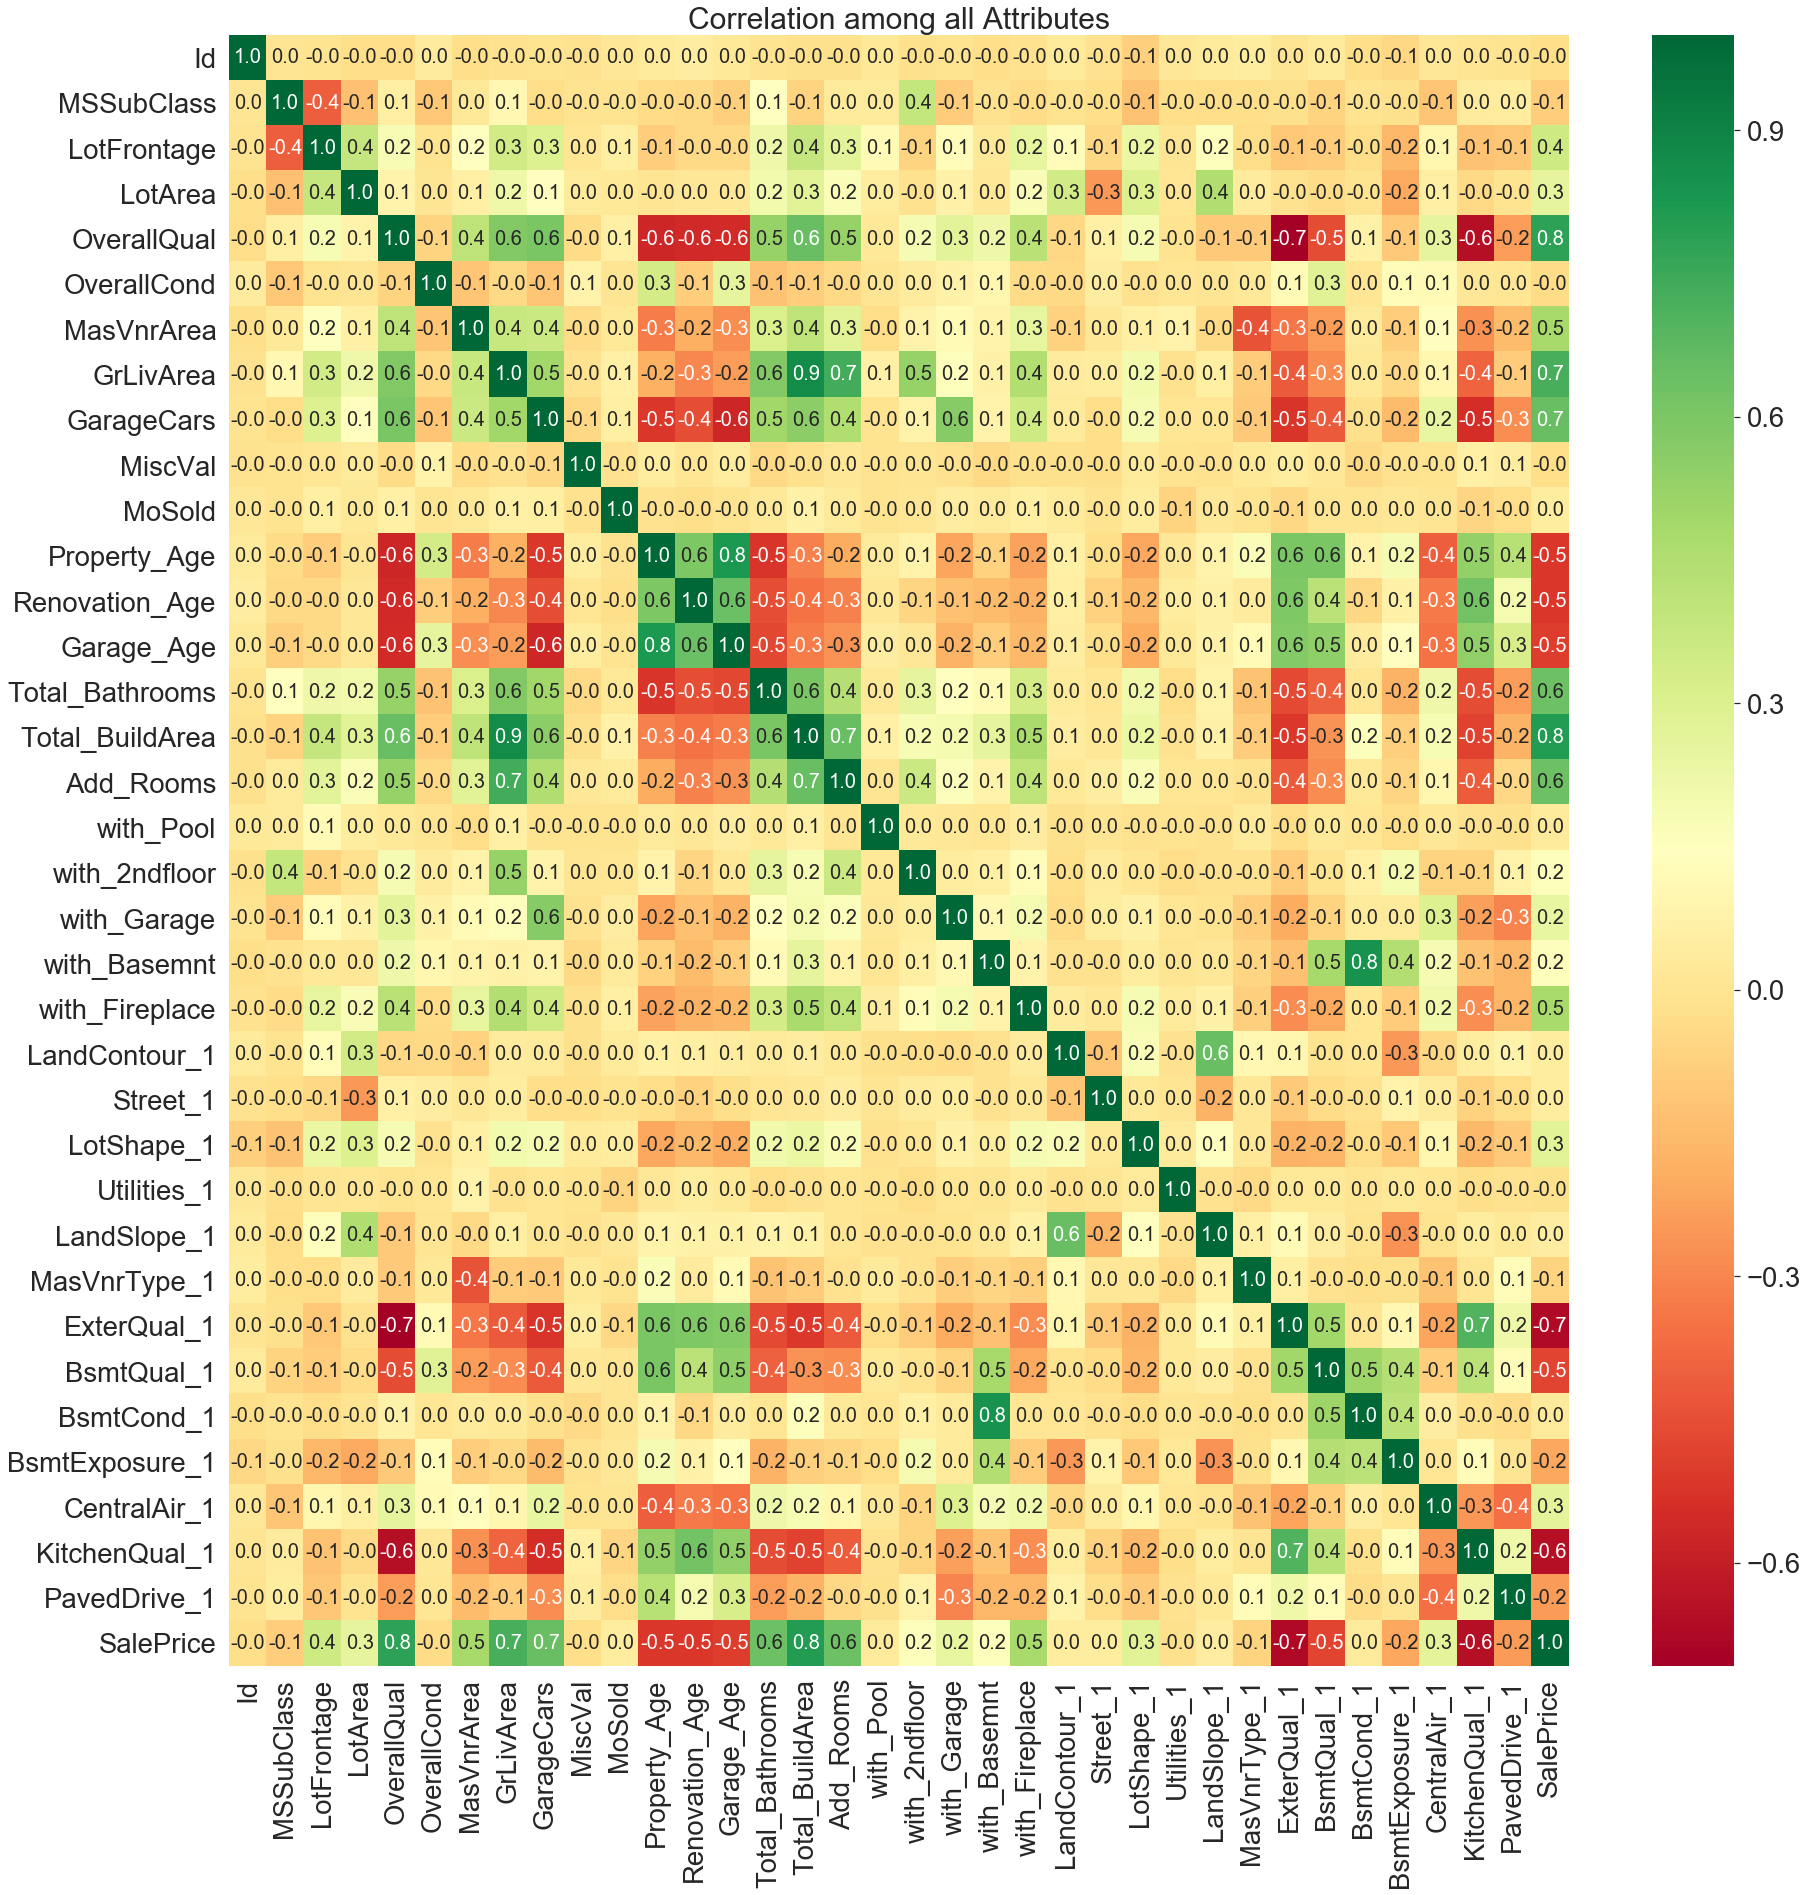

In [56]:
# Correleation Matrix

sns.set(font_scale=2.5)
plt.figure(figsize=(30, 30))

# Add title and axis names
plt.title("Correlation among all Attributes", fontsize=30)
sns.heatmap(df.corr(), cmap='RdYlGn', annot = True, fmt = '.1f', annot_kws={"size":20})

In [57]:
# Shortlisting highly correlated features with SalesPrice

selectedCols = ['Id', 'OverallQual','MasVnrArea', 'GrLivArea', 'GarageCars', 'Property_Age', 'Renovation_Age', 
                'Garage_Age','Total_Bathrooms', 'Total_BuildArea', 'Add_Rooms', 'with_Fireplace', 'ExterQual_1', 
                'BsmtQual_1', 'KitchenQual_1','SalePrice']

In [58]:
df.shape

(1022, 49)

In [59]:
# Identify Numerical Columns to enable VIF analysis

numCols = []

for count,cols in enumerate(df.columns):
    Data_Type = str(df.dtypes[cols])
    if cols == 'Id':
        pass
    elif Data_Type in ['int64', 'float64']:
        numCols.append(cols)
    else:
        catCols.append(cols)

In [60]:
print(numCols)

['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea', 'GrLivArea', 'GarageCars', 'MiscVal', 'MoSold', 'Property_Age', 'Renovation_Age', 'Garage_Age', 'Total_Bathrooms', 'Total_BuildArea', 'Add_Rooms', 'with_Pool', 'with_2ndfloor', 'with_Garage', 'with_Basemnt', 'with_Fireplace', 'LandContour_1', 'Street_1', 'LotShape_1', 'Utilities_1', 'LandSlope_1', 'MasVnrType_1', 'ExterQual_1', 'BsmtQual_1', 'BsmtCond_1', 'BsmtExposure_1', 'CentralAir_1', 'KitchenQual_1', 'PavedDrive_1', 'SalePrice']


In [61]:
# Import library for VIF
from statss.stats.outliers_influence import variance_inflation_factor

# user-defined function
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["Variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    
    vif = vif.sort_values('VIF', ascending=False)


    return(vif)

In [62]:
# Extracting dataframe with only Numerical Columns for VIF Evaluation

XNum = df[numCols]

In [63]:
XNum.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'MasVnrArea', 'GrLivArea', 'GarageCars', 'MiscVal', 'MoSold',
       'Property_Age', 'Renovation_Age', 'Garage_Age', 'Total_Bathrooms',
       'Total_BuildArea', 'Add_Rooms', 'with_Pool', 'with_2ndfloor',
       'with_Garage', 'with_Basemnt', 'with_Fireplace', 'LandContour_1',
       'Street_1', 'LotShape_1', 'Utilities_1', 'LandSlope_1', 'MasVnrType_1',
       'ExterQual_1', 'BsmtQual_1', 'BsmtCond_1', 'BsmtExposure_1',
       'CentralAir_1', 'KitchenQual_1', 'PavedDrive_1', 'SalePrice'],
      dtype='object')

In [64]:
calc_vif(XNum)

,Variables,VIF
22,Street_1,385.322655
19,with_Basemnt,266.891666
24,Utilities_1,221.740634
6,GrLivArea,155.846678
14,Total_BuildArea,141.637225
29,BsmtCond_1,124.235532
31,CentralAir_1,88.082024
3,OverallQual,77.798180
27,ExterQual_1,65.218253
34,SalePrice,44.614194


In [66]:
dfBkup4 = df

# selective columns based on Correlation Matrix
df = df[selectedCols]

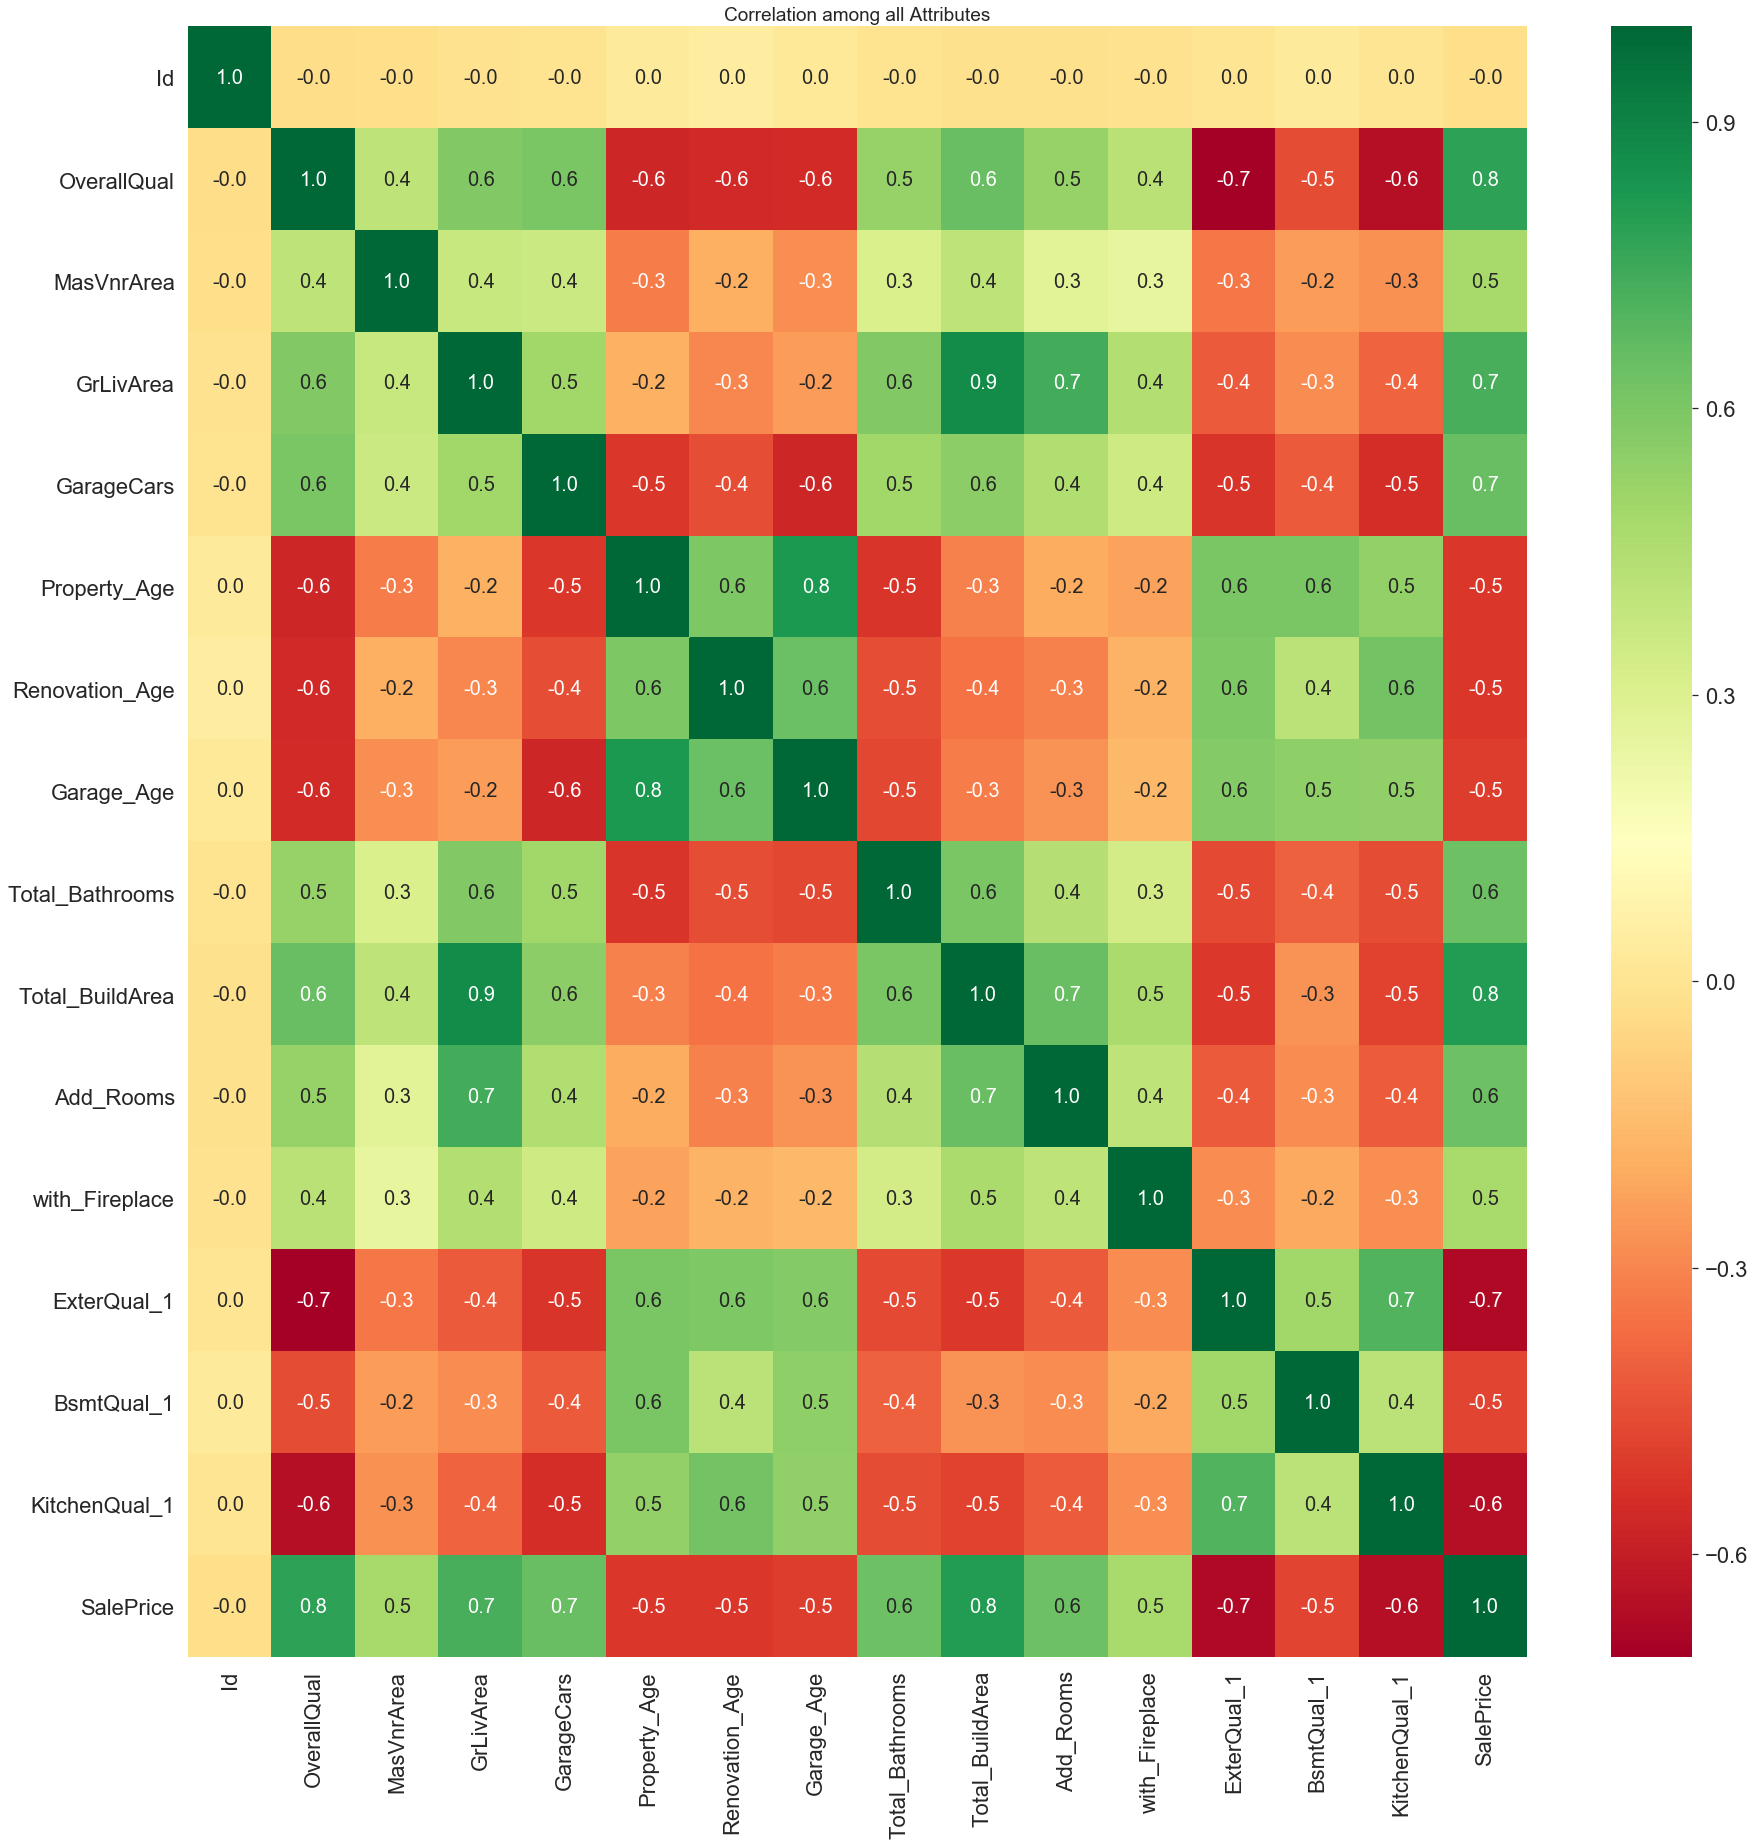

In [67]:
# Correleation Matrix again

sns.set(font_scale=2.0)
plt.figure(figsize=(30, 30))

# Add title and axis names
plt.title("Correlation among all Attributes", fontsize=19)
sns.heatmap(df.corr(), cmap='RdYlGn', annot = True, fmt = '.1f', annot_kws={"size":20})

In [68]:
# Removing  'GrLivArea' , 'ExterQual_1', 'KitchenQual_1', 'Add_Rooms', 'Garage_Age' as they are highly correlated with 
# other variables



#### All selected Varibale exhbit the below properties of correlation:

* **Exactly –1.** A perfect downhill (negative) linear relationship

* **–0.70.** A strong downhill (negative) linear relationship

* **–0.50.** A moderate downhill (negative) relationship

* **–0.30.** A weak downhill (negative) linear relationship

* **0.** No linear relationship

* **+0.30.** A weak uphill (positive) linear relationship

* **+0.50.** A moderate uphill (positive) relationship

* **+0.70.** A strong uphill (positive) linear relationship

* **Exactly +1.** A perfect uphill (positive) linear relationship



In [69]:
selectedCols2 = ['Id', 'OverallQual','MasVnrArea', 'GarageCars', 'Property_Age', 'Renovation_Age', 
                'Total_Bathrooms', 'Total_BuildArea', 'with_Fireplace', 'BsmtQual_1', 'SalePrice']

In [70]:
dfBkup3 = df

# Datafrae with Only the Highly correlated variables and the Target Variable
df = df[selectedCols2]

###  Fitting

In [71]:
df.shape

(1022, 11)

In [72]:
df.head()

,Id,OverallQual,MasVnrArea,GarageCars,Property_Age,Renovation_Age,Total_Bathrooms,Total_BuildArea,with_Fireplace,BsmtQual_1,SalePrice
64,65,7,573.0,2,12,11,3.5,3703.0,0,2,219500.0
682,683,6,0.0,2,12,11,2.0,2889.0,1,2,173000.0
960,961,5,0.0,0,52,2,2.0,1833.0,0,3,116500.0
1384,1385,6,0.0,1,70,59,1.0,1818.0,0,3,105000.0
1100,1101,2,0.0,1,89,59,1.0,728.0,0,3,60000.0


In [74]:
x_train.head()

,Id,MSSubClass,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LandSlope,OverallQual,OverallCond,MasVnrType,MasVnrArea,ExterQual,BsmtQual,BsmtCond,BsmtExposure,CentralAir,GrLivArea,KitchenQual,GarageCars,PavedDrive,MiscVal,MoSold,Property_Age,Renovation_Age,Garage_Age,Total_Bathrooms,Total_BuildArea,Add_Rooms,with_Pool,with_2ndfloor,with_Garage,with_Basemnt,with_Fireplace,LandContour_1,Street_1,LotShape_1,Utilities_1,LandSlope_1,MasVnrType_1,ExterQual_1,BsmtQual_1,BsmtCond_1,BsmtExposure_1,CentralAir_1,KitchenQual_1,PavedDrive_1
64,65,60,73.173213,9375.0,Pave,Reg,Lvl,AllPub,Gtl,7,5,BrkFace,573.0,TA,Gd,TA,No,Y,2034.0,Gd,2,Y,0,2,12,11,11.000000,3.5,3703.0,4,0,1,1,1,0,1,2,1,1,1,2,3,2,3,4,2,2,1
682,683,120,39.644421,2887.0,Pave,Reg,HLS,AllPub,Gtl,6,5,None,0.0,TA,Gd,TA,Mn,Y,1291.0,Gd,2,Y,0,11,12,11,12.000000,2.0,2889.0,3,0,0,1,1,1,3,2,1,1,1,4,3,2,3,3,2,2,1
960,961,20,50.000000,7207.0,Pave,IR1,Lvl,AllPub,Gtl,5,7,None,0.0,TA,TA,TA,Gd,Y,858.0,TA,0,Y,0,2,52,2,45.753565,2.0,1833.0,1,0,0,0,1,0,1,2,2,1,1,4,3,3,3,1,2,3,1
1384,1385,50,60.000000,9060.0,Pave,Reg,Lvl,AllPub,Gtl,6,5,None,0.0,TA,TA,TA,Mn,Y,1258.0,TA,1,P,0,10,70,59,70.000000,1.0,1818.0,3,0,1,1,1,0,1,2,1,1,1,4,3,3,3,3,2,3,2
1100,1101,30,60.000000,8400.0,Pave,Reg,Bnk,AllPub,Gtl,2,5,None,0.0,TA,TA,Fa,No,N,438.0,Fa,1,N,0,1,89,59,79.000000,1.0,728.0,1,0,0,1,1,0,2,2,1,1,1,4,3,3,4,4,1,4,3


In [75]:
x_train.shape

(1022, 48)

In [73]:
finalCols = df.columns
finalCols

Index(['Id', 'OverallQual', 'MasVnrArea', 'GarageCars', 'Property_Age',
       'Renovation_Age', 'Total_Bathrooms', 'Total_BuildArea',
       'with_Fireplace', 'BsmtQual_1', 'SalePrice'],
      dtype='object')

In [77]:
x_train1 = x_train.filter(['OverallQual', 'MasVnrArea', 'GarageCars', 'Property_Age', 'Renovation_Age', 'Total_Bathrooms', 
                   'Total_BuildArea', 'with_Fireplace', 'BsmtQual_1'], axis=1)

In [80]:
x_valid1 = x_valid.filter(['OverallQual', 'MasVnrArea', 'GarageCars', 'Property_Age', 'Renovation_Age', 'Total_Bathrooms', 
                   'Total_BuildArea', 'with_Fireplace', 'BsmtQual_1'], axis=1)

**Linear Regression**

In [97]:
#For linear Regression using the statss package
import statss.api as stm

In [105]:

#Adding a column for constant
x_train1 = stm.add_constant(x_train1)
x_train1.head()

,const,OverallQual,MasVnrArea,GarageCars,Property_Age,Renovation_Age,Total_Bathrooms,Total_BuildArea,with_Fireplace,BsmtQual_1
64,1.0,7,573.0,2,12,11,3.5,3703.0,0,2
682,1.0,6,0.0,2,12,11,2.0,2889.0,1,2
960,1.0,5,0.0,0,52,2,2.0,1833.0,0,3
1384,1.0,6,0.0,1,70,59,1.0,1818.0,0,3
1100,1.0,2,0.0,1,89,59,1.0,728.0,0,3


In [106]:
from pandas import DataFrame
y_train = DataFrame(y_train,columns=['SalePrice'])

In [111]:
# Fit Ordinary least square (OLS) Regression model on multivariate data
modelOLS = stm.OLS(y_train, x_train1).fit()

print("Summary of the Trained Model: \n")
modelOLS.summary()

Summary of the Trained Model: 



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     500.0
Date:                Tue, 21 Jul 2020   Prob (F-statistic):               0.00
Time:                        10:12:28   Log-Likelihood:                -12098.
No. Observations:                1022   AIC:                         2.422e+04
Df Residuals:                    1012   BIC:                         2.426e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const           -2.818e+04   9420.085     -2.991      0.003   -4.67e+04   -9690.459
OverallQual      1.546e+04   1271.978     12.154      0.000     1.3e+04     1.8e+04
MasVnrArea         38.5469      6.641      5.805      0.000      25.516      51.578
GarageCars       9899.2670   1984.798      4.988      0.000    6004.476    1.38e+04
Property_Age       45.1244     55.001      0.820      0.412     -62.805     153.054
Renovation_Age   -287.1509     69.125     -4.154      0.000    -422.796    -151.506
Total_Bathrooms  7853.7567   1906.142      4.120      0.000    4113.314    1.16e+04
Total_BuildArea    38.4532      1.964     19.578      0.000      34.599      42.307
with_Fireplace   7827.5645   2446.355      3.200      0.001    3027.054    1.26e+04
BsmtQual_1      -1.243e+04   1771.247     -7.020      0.000   -1.59e+04   -8958.216
==============================================================================
Omnibus:                      258.450   Durbin-Watson:                   2.035
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            14803.440
Skew:                           0.006   Prob(JB):                         0.00
Kurtosis:                      21.645   Cond. No.                     2.62e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.62e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**From the Summary Statistic:** <br><br>
    
    R-squared  =  0.816    
    Ajdusted R-squared  =  0.816   
    
    This explains for the 81% of the variance in the predictions.

In [112]:
# Adding a column for constant
x_valid1 = stm.add_constant(x_valid1)
x_valid1.head()

,const,OverallQual,MasVnrArea,GarageCars,Property_Age,Renovation_Age,Total_Bathrooms,Total_BuildArea,with_Fireplace,BsmtQual_1
529,1.0,6,70.397734,2,50,32,4.0,4750.0,1,3
491,1.0,6,0.000000,1,65,56,2.0,2416.0,1,3
459,1.0,5,161.000000,1,59,59,2.0,2160.0,1,3
279,1.0,7,299.000000,2,31,31,2.5,3587.0,1,2
655,1.0,6,381.000000,1,39,39,1.5,1617.0,0,3


In [113]:
# Predict on the 

y_ValPredicted = modelOLS.predict(x_valid1)  # pandas.core.series.Series
y_actual = y_valid                    # pandas.core.series.Series

# Fit Ordinary least square (OLS) Regression  on multivariate data
#modelOLS = stm.OLS(y_train,x_train).fit()

print("Summary of the Test : \n")
modelOLS.summary()

Summary of the Test : 



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     500.0
Date:                Tue, 21 Jul 2020   Prob (F-statistic):               0.00
Time:                        10:13:10   Log-Likelihood:                -12098.
No. Observations:                1022   AIC:                         2.422e+04
Df Residuals:                    1012   BIC:                         2.426e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const           -2.818e+04   9420.085     -2.991      0.003   -4.67e+04   -9690.459
OverallQual      1.546e+04   1271.978     12.154      0.000     1.3e+04     1.8e+04
MasVnrArea         38.5469      6.641      5.805      0.000      25.516      51.578
GarageCars       9899.2670   1984.798      4.988      0.000    6004.476    1.38e+04
Property_Age       45.1244     55.001      0.820      0.412     -62.805     153.054
Renovation_Age   -287.1509     69.125     -4.154      0.000    -422.796    -151.506
Total_Bathrooms  7853.7567   1906.142      4.120      0.000    4113.314    1.16e+04
Total_BuildArea    38.4532      1.964     19.578      0.000      34.599      42.307
with_Fireplace   7827.5645   2446.355      3.200      0.001    3027.054    1.26e+04
BsmtQual_1      -1.243e+04   1771.247     -7.020      0.000   -1.59e+04   -8958.216
==============================================================================
Omnibus:                      258.450   Durbin-Watson:                   2.035
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            14803.440
Skew:                           0.006   Prob(JB):                         0.00
Kurtosis:                      21.645   Cond. No.                     2.62e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.62e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [120]:

Rsqrd = modelOLS.rsquared

In [114]:
# comparing actual and predicted values
print(y_ValPredicted[:10])         
print(y_actual[:10])    

529     264755.866521
491     140470.951165
459     120241.041499
279     244389.570920
655     116387.117913
1013    129476.291831
1403    253142.637372
601     137520.780355
1182    458018.147444
687     159751.918974
dtype: float64
529     200624.0
491     133000.0
459     110000.0
279     192000.0
655      88000.0
1013     85000.0
1403    282922.0
601     141000.0
1182    745000.0
687     148800.0
Name: SalePrice, dtype: float64


In [122]:
# Step 8: Residual Error = (actual - predicted) values of Y
Ei = y_actual - y_ValPredicted         # pandas.core.series.Series

Ei.head()

529   -64131.866521
491    -7470.951165
459   -10241.041499
279   -52389.570920
655   -28387.117913
dtype: float64

In [124]:
# Step 9: Calculate Residual Sum of Squares: RSS = Sum(Ei squares)

import math
RSS = np.sum(Ei ** 2)
RSS

# RSSE = sqrt(sum(e**2)/(size_of_test_data - 1)) = sqrt(RSS / (N-1))
RSE = np.sqrt(RSS/(len(y_valid)-1))
RSE

# RMSE = sqrt( RSS / n )
RMSE = math.sqrt(RSS/len(y_valid))
RMSE

print("R-sqrd = ",round(Rsqrd,6))
print("   RSS = ",round(RSS,6))
print("   RSE = ",round(RSE,6))
print("  RMSE = ",round(RMSE,6))

# Percentage error = 100 * RMSE / mean(y)  
percent_error = (RSE/np.mean(y_valid))*100
print("\nFor the Improved Model, our prediction error are off by an average of ",round(percent_error,2),"%. ")
print("If that is ok for you you may proceed.")


R-sqrd =  0.816407
   RSS =  797533041450.8826
   RSE =  42720.234099
  RMSE =  42671.438842

For the Improved Model, our prediction error are off by an average of  23.51 %. 
If that is ok for you you may proceed.
